In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("cust_satisfaction.csv") ## dependent variable = customer type
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [44]:
df.duplicated().sum()

np.int64(172)

In [45]:
df.drop_duplicates()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [46]:
df.drop_duplicates(inplace = True)

In [47]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [48]:
df.dropna(inplace = True)

In [49]:
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [50]:
df["Customer Type"].value_counts() ## these are imbalance  agr hum 
# balance nhi krenege to vo hr unseen data ko loyal customer hi btayega kyuki usne usi ka data jayda dekha ahil

Customer Type
Loyal Customer       84517
disloyal Customer    18905
Name: count, dtype: int64

In [51]:
loyal_customer = df[df["Customer Type"] == "Loyal Customer"]
disloyal_customer = df[df["Customer Type"] == "disloyal Customer"]

In [52]:
loyal_customer = loyal_customer.sample(20000)
loyal_customer.shape

(20000, 12)

In [53]:

balance_df = pd.concat([loyal_customer,disloyal_customer])

In [54]:
balance_df.shape

(38905, 12)

In [55]:
cat_col = balance_df.select_dtypes(include= "object")
cat_col.head()


,Gender,Customer Type,Type of Travel,Class,satisfaction
26007,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
38422,Female,Loyal Customer,Business travel,Business,satisfied
24981,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
89978,Female,Loyal Customer,Business travel,Business,satisfied
103329,Male,Loyal Customer,Personal Travel,Eco,satisfied


In [56]:
num_col = balance_df.select_dtypes(exclude="object")
num_col.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
26007,37,929,4,4,4,0,0.0
38422,39,3112,5,5,4,2,2.0
24981,67,495,4,2,4,0,0.0
89978,52,936,4,4,4,0,0.0
103329,27,113,1,1,1,0,0.0


In [57]:
pd.get_dummies(cat_col)

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
26007,False,True,True,False,False,True,False,True,False,True,False
38422,True,False,True,False,True,False,True,False,False,False,True
24981,False,True,True,False,False,True,False,True,False,True,False
89978,True,False,True,False,True,False,True,False,False,False,True
103329,False,True,True,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
103892,True,False,False,True,True,False,True,False,False,True,False
103895,True,False,False,True,True,False,False,True,False,True,False
103899,True,False,False,True,True,False,False,True,False,True,False
103901,False,True,False,True,True,False,True,False,False,True,False


In [58]:
pd.get_dummies(cat_col).astype(int).head()

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
26007,0,1,1,0,0,1,0,1,0,1,0
38422,1,0,1,0,1,0,1,0,0,0,1
24981,0,1,1,0,0,1,0,1,0,1,0
89978,1,0,1,0,1,0,1,0,0,0,1
103329,0,1,1,0,0,1,0,1,0,0,1


In [59]:
pd.get_dummies(cat_col, drop_first=True).astype(int).head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
26007,1,0,1,1,0,0
38422,0,0,0,0,0,1
24981,1,0,1,1,0,0
89978,0,0,0,0,0,1
103329,1,0,1,1,0,1


In [60]:
print(cat_col["Gender"].value_counts())
print(cat_col["Customer Type"].value_counts())
print(cat_col["Type of Travel"].value_counts())
print(cat_col["Class"].value_counts())
print(cat_col["satisfaction"].value_counts())

Gender
Female    20210
Male      18695
Name: count, dtype: int64
Customer Type
Loyal Customer       20000
disloyal Customer    18905
Name: count, dtype: int64
Type of Travel
Business travel    31135
Personal Travel     7770
Name: count, dtype: int64
Class
Eco         19299
Business    17269
Eco Plus     2337
Name: count, dtype: int64
satisfaction
neutral or dissatisfied    24865
satisfied                  14040
Name: count, dtype: int64


In [61]:
# dt = dt={"Loyal Customer" : 0,"disloyal Customer" :1}
# dt1={"Female" : 0,"Male " :1}
# dt2={"Business travel" : 0,"Personal Travel" :1}
# dt3={"Business" : 0,"ECO" :1,"Eco Plus":2}
# dt4={"neutral or dissatisfied " : 0,"satisfied " :1}

In [62]:
# cat_col["Customer Type"]=cat_col["Customer Type"].map(dt)
# cat_col["Gender"]=cat_col["Gender"].map(dt1)
# cat_col["Type of Travel"]=cat_col["Type of Travel"].map(dt2)
# cat_col["Class"]=cat_col["Class"].map(dt3)
# cat_col["satisfaction"]=cat_col["satisfaction"].map(dt4)

In [63]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder

In [64]:
one = OneHotEncoder(drop = "if_binary")
cat_col_encoded = one.fit_transform(cat_col).toarray()
cat_col_encoded

array([[1., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [65]:
column_name =  list(one.get_feature_names_out())
column_name

['Gender_Male',
 'Customer Type_disloyal Customer',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'satisfaction_satisfied']

In [66]:
one_hot = pd.DataFrame(cat_col_encoded,columns= column_name)
one_hot

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
38900,0.0,1.0,0.0,1.0,0.0,0.0,0.0
38901,0.0,1.0,0.0,0.0,1.0,0.0,0.0
38902,0.0,1.0,0.0,0.0,1.0,0.0,0.0
38903,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [67]:
num_col

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
26007,37,929,4,4,4,0,0.0
38422,39,3112,5,5,4,2,2.0
24981,67,495,4,2,4,0,0.0
89978,52,936,4,4,4,0,0.0
103329,27,113,1,1,1,0,0.0
...,...,...,...,...,...,...,...
103892,37,596,3,3,3,110,121.0
103895,24,1055,1,5,1,13,10.0
103899,23,192,2,4,2,3,0.0
103901,30,1995,4,4,4,7,14.0


In [68]:
one_hot = one_hot.reset_index(drop=True)
num_col = num_col.reset_index(drop=True)
final_df = pd.concat([one_hot,num_col],axis = 1)
final_df.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,37,929,4,4,4,0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,39,3112,5,5,4,2,2.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,67,495,4,2,4,0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,52,936,4,4,4,0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,27,113,1,1,1,0,0.0


In [69]:
matrix = final_df.corr()
matrix

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Gender_Male,1.000000,-0.041936,0.014321,0.024928,-0.007485,-0.036373,0.021250,0.018890,0.018120,0.011526,0.030433,0.010869,0.003625,0.000596
Customer Type_disloyal Customer,-0.041936,1.000000,-0.464722,-0.110080,0.152857,-0.091467,-0.251264,-0.381757,-0.328638,-0.138757,0.033589,-0.101884,0.008472,0.009237
Type of Travel_Personal Travel,0.014321,-0.464722,1.000000,-0.372285,0.322846,0.099102,-0.267616,0.077391,-0.124504,-0.066202,-0.029243,-0.028461,-0.017130,-0.018574
Class_Business,0.024928,-0.110080,-0.372285,1.000000,-0.886376,-0.225852,0.440797,0.173536,0.376348,0.137101,0.244607,0.091735,-0.015415,-0.019971
Class_Eco,-0.007485,0.152857,0.322846,-0.886376,1.000000,-0.250814,-0.401376,-0.181711,-0.335683,-0.125676,-0.203980,-0.085192,0.013692,0.016522
Class_Eco Plus,-0.036373,-0.091467,0.099102,-0.225852,-0.250814,1.000000,-0.077117,0.019499,-0.080585,-0.022227,-0.082249,-0.012555,0.003422,0.006992
satisfaction_satisfied,0.021250,-0.251264,-0.267616,0.440797,-0.401376,-0.077117,1.000000,0.127791,0.276215,0.281478,0.223569,0.212933,-0.043488,-0.050889
Age,0.018890,-0.381757,0.077391,0.173536,-0.181711,0.019499,0.127791,1.000000,0.139848,0.084006,-0.043142,0.054545,-0.008547,-0.010365
Flight Distance,0.018120,-0.328638,-0.124504,0.376348,-0.335683,-0.080585,0.276215,0.139848,1.000000,0.119753,0.045764,0.087760,0.002516,-0.000071
Inflight entertainment,0.011526,-0.138757,-0.066202,0.137101,-0.125676,-0.022227,0.281478,0.084006,0.119753,1.000000,0.242900,0.800055,-0.022853,-0.025857


<Axes: >

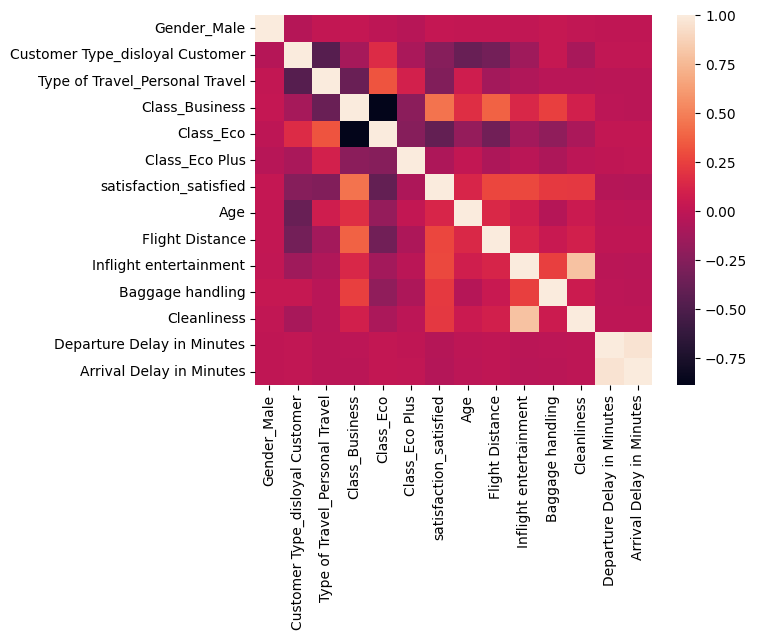

In [70]:
sns.heatmap(matrix)

In [71]:
##x and y ----> train test split ----->algo training


<Axes: >

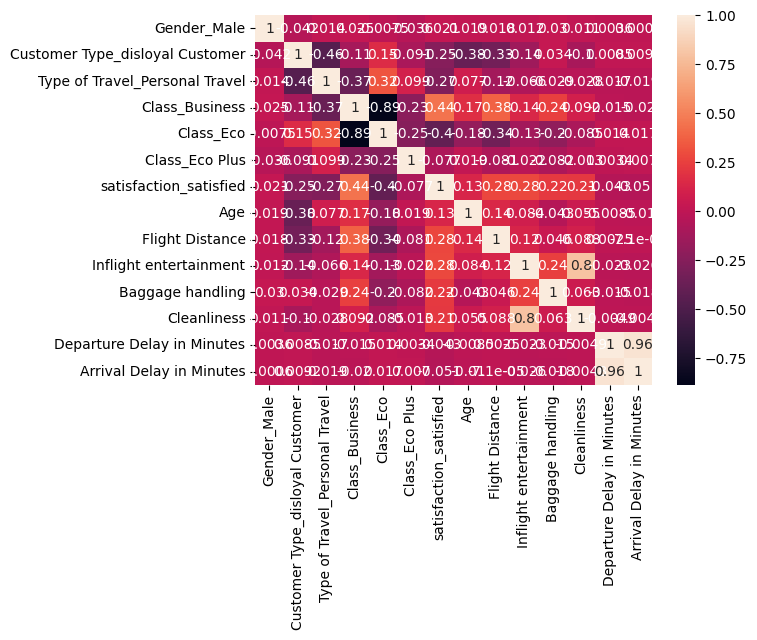

In [72]:
sns.heatmap(matrix , annot= True)

In [73]:
final_df.columns

Index(['Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'satisfaction_satisfied', 'Age', 'Flight Distance',
       'Inflight entertainment', 'Baggage handling', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [74]:
##divide the data into dependent and independent variable
x = final_df.drop("Customer Type_disloyal Customer",axis = 1)
y = final_df["Customer Type_disloyal Customer"]

In [75]:
#training and testing the data
from sklearn.model_selection import train_test_split
x_train , x_test , y_train  , y_test = train_test_split(x,y, test_size=0.2 , random_state= 42)


In [76]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train ,y_train) 

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


<!-- <html image src 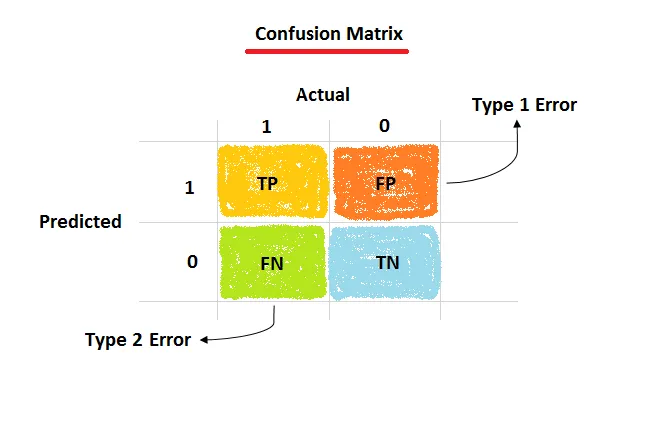> -->

In [79]:
predictions = lr.predict(x_test)

In [80]:
predictions

array([0., 1., 0., ..., 1., 1., 0.])

< img src 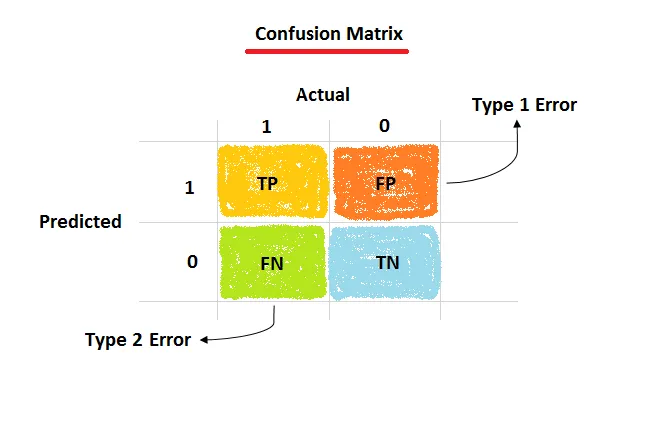>

In [81]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predictions))
     ## important for interviews

[[3561  441]
 [ 785 2994]]


In [82]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      4002
         1.0       0.87      0.79      0.83      3779

    accuracy                           0.84      7781
   macro avg       0.85      0.84      0.84      7781
weighted avg       0.84      0.84      0.84      7781

